# Natural Language Processing (NLP)
* NLP is the processing of a text collection
    * Text collection: a corpus (corpora for plural)
    * Examples
        * Your responses to free response questions on surveys
        * Social media posts
        * Messaging conversations
        * Books, articles, blog posts, ...
        * Etc.
* NLP is notoriously difficulty because natural language lacks mathematical precision
* Thankfully, there are alot of really great Python libraries for NLP!!!
    * Let's see some of these in action with business reviews from the [Yelp API](https://www.yelp.com/developers)
    
# NLP Demo w/Yelp API
Yelp Developers: https://www.yelp.com/developers and more specifically the Yelp Fusion API documentation: https://docs.developer.yelp.com/docs/fusion-intro

In [ ]:
import requests
import json

# free API key access has disappeared... free trial access only (bummer!)
# documentation at https://docs.developer.yelp.com/docs/fusion-authentication
api_key = "YOUR API KEY HERE"
headers = {"Authorization": "Bearer " + api_key}
    
def get_place_id(search_term):
    # documentation at https://www.yelp.com/developers/documentation/v3/business_search
    url = "https://api.yelp.com/v3/businesses/search"
    url += "?term=" + search_term
    # GU GPS coords
    url += "&latitude=47.6670357"
    url += "&longitude=-117.403623"
    
    response = requests.get(url=url, headers=headers)
    json_object = json.loads(response.text)

    place_id = json_object["businesses"][0]["id"]
    print(search_term, "id:", place_id)
    
    return place_id
    
def get_reviews(search_term):
    # documentation at https://www.yelp.com/developers/documentation/v3/business_reviews
    # returns three reviews in yelp "default order"
    place_id = get_place_id(search_term)
    url = "https://api.yelp.com/v3/businesses/" + place_id + "/reviews"
    response = requests.get(url=url, headers=headers)
    json_object = json.loads(response.text)
    reviews_array = json_object["reviews"]
    reviews_text = []
    for review_object in reviews_array:
        reviews_text.append(review_object["text"])
    return reviews_text

restaurant1 = "sushi+blossom"
restaurant2 = "clarks+fork"
reviews_dict = {restaurant1: get_reviews(restaurant1), restaurant2: get_reviews(restaurant2)}

sushi+blossom id: xCXVTiDd8SevCmXARta8CQ
clarks+fork id: islkGrS0OSgG9zqdgmjR4Q


In [2]:
for name, reviews in reviews_dict.items():
    print("***",name, "reviews", "***")
    for i, review in enumerate(reviews):
        print(f"{i}: \"{review}\"")
    print()

*** sushi+blossom reviews ***
0: "Really high quality sushi, which my family enjoyed for lunch. Salmon in our rolls was very fresh. Philly roll was a highlight. 
Staff was friendly and did a..."
1: "Excellent hole in the wall place that we came to on a weekend lunch right when it opened. We decided to splurge for lunch due to travel and ordered a large..."
2: "Sushi / Sashimi for two was excellent. Calamari app was good. Service kind of lacking though. Food good ambiance is just ok. I could eat here again."

*** clarks+fork reviews ***
0: "The food was excellent. The service was great even on weekends when very busy. The ambiance was great. The owner and staff give you service like you were..."
1: "Found Clark's Fork while visiting Spokane from LA  for the NCAA WBB Regionals.  We ate breakfast there every morning of our stay.  Great food, friendly..."
2: "Busy place but worth it! Great service by the staff. We had breakfast there. Food was delicious, coffee quite satisfactory, and the 

## Task 1
Compute the average polarity of the reviews using `textblob` module (polarity indicates sentiment in [-1.0 (negative), 1.0 (positive)] 0.0 is neutral). Does this seem in line with the average rating for each business?

In [3]:
from textblob import TextBlob

def compute_average_polarity(reviews):
  polarities = []
  for review in reviews:
    blob = TextBlob(review)
    polarities.append(blob.sentiment.polarity)

  return sum(polarities) / len(polarities)

for place, reviews in reviews_dict.items():
  print(place, "average polarity:", compute_average_polarity(reviews))

sushi+blossom average polarity: 0.4666666666666666
clarks+fork average polarity: 0.5892857142857143


## Task 2
Visualize the frequencies of words in both sets of business reviews with word clouds using `wordcloud` module. Do the most frequent words in each provide more context for your polarity result?

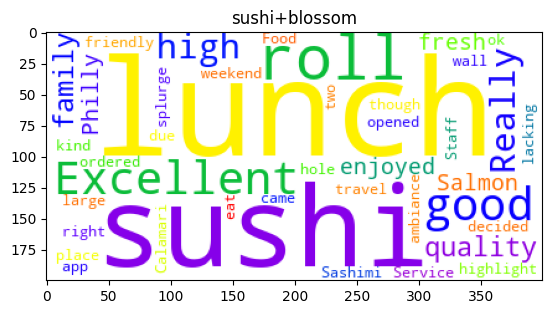

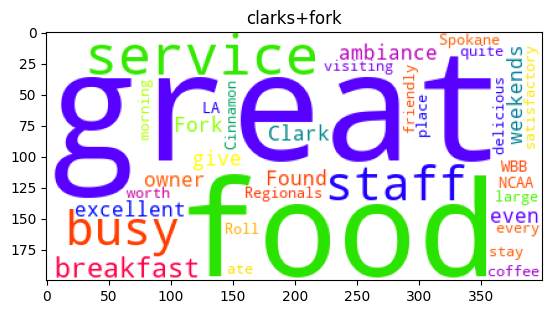

In [4]:
from wordcloud import WordCloud 
# wordcloud built on matplotlib
import matplotlib.pyplot as plt
def show_wordcloud(name, text):
  wc = WordCloud(colormap="prism", background_color="white")
  wc.generate(text)
  plt.imshow(wc)
  plt.title(name)
  plt.show()
for place, reviews in reviews_dict.items():
  reviews_str = ". ".join(reviews)
  show_wordcloud(place, reviews_str)

## Task 3
Compute readability scores for each set of reviews using `textatistic` module. Compare the Dale-Chall scores, which is a score that can be mapped to grade levels from 4 and below to college graduate (grade 16) and above. This score is considered to be most reliable for a broad range of text types.

What can these scores be used for? (with the small sample size we have we can't make any definitive conclusions...)

In [5]:
from textatistic import Textatistic 

def print_readability_scores(name, text):
  print(name, "readability scores")
  readability = Textatistic(text)
  for stat, value in readability.dict().items():
    print(stat, "->", value)
  print()

for place, reviews in reviews_dict.items():
  reviews_str = ". ".join(reviews)
  print_readability_scores(place, reviews_str)

sushi+blossom readability scores
char_count -> 383
word_count -> 85
sent_count -> 17
sybl_count -> 101
notdalechall_count -> 18
polysyblword_count -> 2
flesch_score -> 101.23529411764709
fleschkincaid_score -> 0.381176470588235
gunningfog_score -> 2.9411764705882355
smog_score -> 5.088555806805433
dalechall_score -> 7.228264705882353

clarks+fork readability scores
char_count -> 391
word_count -> 80
sent_count -> 19
sybl_count -> 103
notdalechall_count -> 13
polysyblword_count -> 6
flesch_score -> 93.6388157894737
fleschkincaid_score -> 1.2446052631578972
gunningfog_score -> 4.684210526315789
smog_score -> 6.339386263674447
dalechall_score -> 6.411217105263158



## Task 4
Perform named entity recognition using `spaCy`. What dates, times, quantities, places, people, things, organizations, do people mention in their reviews of these businesses?

In [6]:
import spacy
nlp = spacy.load("en_core_web_sm")

for place, reviews in reviews_dict.items():
  print(place)
  reviews_str = ". ".join(reviews)
  document = nlp(reviews_str)
  for entity in document.ents:
    print(entity.text, "->", entity.label_)
  print()

sushi+blossom
Sushi / Sashimi -> ORG
two -> CARDINAL
Calamari -> ORG

clarks+fork
Found Clark's Fork -> PERSON
Spokane -> GPE
LA -> GPE
the NCAA WBB Regionals -> ORG
every morning -> TIME
Cinnamon Roll -> ORG



## Task 5
Calculate document similarity using `spaCy` to determine how alike the review sets are in terms of word frequencies, writing styles, etc. Do you hypothesize there are other businesses (but still in this category) that would have reviews that are more or less similar to these? Test your theories out with the API and `spaCy` :)

In [7]:
document1 = nlp(". ".join(reviews_dict[restaurant1]))
document2 = nlp(". ".join(reviews_dict[restaurant2]))
print(document1.similarity(document2))
# see notes on github for how to get rid of the warning

0.8460394144058228


/var/folders/xq/gg44p4b95tl51sf74rbthlj40000gn/T/ipykernel_16398/3201775278.py:3: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(document1.similarity(document2))
